# TWICE Line Distribution

## Background

This personal project delves into analyzing the line distribution among TWICE members, utilizing web scraping techniques and hypothesis testing methodologies.

As context, these are the official positions of the members:
- **Nayeon**: Lead Vocalist
- **Jeongyeon**: Lead Vocalist
- **Momo**: Main Dancer, Vocalist
- **Sana**: Vocalist
- **Jihyo**: Leader, Main Vocalist
- **Mina**: Main Dancer, Vocalist
- **Dahyun**: Lead Rapper, Vocalist
- **Chaeyoung**: Main Rapper, Vocalist
- **Tzuyu**: Lead Dancer, Vocalist: 

## Problem Statement

### Hypothesis Testing:

Based on domain knowledge, Nayeon and Jihyo tends to sing a substantial portion of songs. Hence, I would like to test whether Nayeon and Jihyo have similar line distributions.

**Null Hypothesis:** Nayeon and Jihyo have similar line distributions

**Alternative Hypothesis:** Nayeon and Jihyo does not have similar line distributions

**Test Statistic:** Absolute difference of mean song lines

Based on domain knowledge, although Chaeyoung is the Main Rapper, Dahyun tends to get the iconic rap lines. Hence, I would like to also test whether Dahyun and Chaeyoung have similar line distributions.

**Null Hypothesis:** Dahyun and Chaeyoung have similar line distributions

**Alternative Hypothesis:** Dahyun and Chaeyoung does not have similar line distributions

**Test Statistic:** Absolute difference of mean song lines

*We are using **5% significance level** for both tests*


## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import requests
import re
from bs4 import BeautifulSoup

In [2]:
#Getting the landing page
url = 'https://twicecolourlyrics1.wordpress.com/line-distribution/'
response = requests.get(url)

if response.status_code == 200:
    landing = response.text
else:
    print("Failed to retrieve the content. Status code:", response.status_code)

In [3]:
def parse_link(urls):
    urls = [url.find('a').get('href') if url.find('a') is not None else '' for url in urls]
    urls = [url for url in urls if url.startswith('https')]
    return urls

#Getting the link of pages to scrape
soup = BeautifulSoup(landing, 'html.parser')
urls_1 = soup.find_all('p', style="text-align: left")
urls_1 = parse_link(urls_1)

urls_2 = soup.find_all('span', style=lambda value: value and 'color:' in value)
urls_2 = parse_link(urls_2)

for url in urls_2:
    if url not in urls_1:
        urls_1.append(url)
        
urls_1[:5]

['https://twicecolourlyrics1.wordpress.com/2018/12/13/the-story-begins-20-10-15-ld/',
 'https://twicecolourlyrics1.wordpress.com/2018/12/17/page-two-25-4-16-ld/',
 'https://twicecolourlyrics1.wordpress.com/2018/12/18/twicecoaster-lane-1-24-10-16-ld/',
 'https://twicecolourlyrics1.wordpress.com/2018/12/19/twicecoaster-lane-2-20-02-17-ld/',
 'https://twicecolourlyrics1.wordpress.com/2019/04/14/signal-15-05-17-ld/']

In [4]:
len(urls_1)

46

There are 46 pages to scrape.

In [5]:
#Scraping the line distributions for each song and member
songs = {}
for url in urls_1:
    response = requests.get(url)
    data = response.text
    
    soup = BeautifulSoup(data, 'html.parser')
    
    line_distributions = soup.find_all('span', style="color: #000000")
    if len(line_distributions) == 0:
        line_distributions = soup.find_all('span', style="color: #999999")
    
    if len(line_distributions) <= 10:
        line_distributions = [int(match.group(1)) for span in line_distributions for match in re.finditer(r'– (\d+)', str(span))]
    else:
        line_distributions = [int(match.group(1)) for span in line_distributions for match in re.finditer(r'– (\d+)', str(span))][:-10]
    
    titles = soup.find_all('p')
    titles = [title.find('a').text if title.find('a') is not None else '' for title in titles]
    titles = [title for title in titles if title.strip() != '' and not title.startswith('Click to share')]
    
    if len(titles) == 0:
        titles = soup.find_all('h4', style="text-align: left")
        titles = [title.find('a').text if title.find('a') is not None else '' for title in titles]
        titles = [title for title in titles if title.strip() != '' and not title.startswith('Click to share')]
        
    for index, title in enumerate(titles, start=0):
        songs[title] = line_distributions[index * 10 : (index + 1) * 10]

In [6]:
#Manually imputing the line distribution some of the songs
songs['Push & Pull / Jihyo, Sana, Dahyun'] = [0, 0, 0, 21, 34, 0, 19, 0, 0, 2]
songs['Hello / Nayeon, Momo, Chaeyoung'] = [20, 0, 13, 0, 0, 0, 0, 14, 0, 1]
songs['1, 3, 2 / Jeongyeon, Mina, Tzuyu'] = [0, 17, 0, 0, 0, 16, 0, 0, 13, 3]
songs['Candy'] = [8, 2, 2, 4, 5, 6, 4, 2, 4, 12]
songs['The Feels (Korean Ver.)'] = [18, 5, 7, 5, 24, 5, 4, 11, 3, 0]
songs['당돌한 여자 Daring Women'] = [14, 0, 0, 0, 20, 0, 0, 10, 8, 0]
songs['누구보다 널 사랑해 (I Love You More Than Anyone)'] = [4, 2, 12, 5, 4, 5, 8, 8, 3, 0]
songs['Just Be Yourself'] = [13, 5, 6, 6, 13, 7, 4, 4, 4, 0]
songs

{'OOH-AHH하게 Like OOH-AHH': [9, 3, 2, 3, 15, 4, 3, 3, 2, 16],
 '다시 해줘 Do It Again': [5, 8, 9, 3, 6, 6, 5, 6, 5, 9],
 '미쳤나봐 Going Crazy': [5, 5, 3, 5, 8, 6, 6, 6, 5, 2],
 'Truth': [11, 18, 3, 4, 15, 3, 2, 4, 2, 19],
 'Candy Boy': [7, 6, 4, 3, 8, 6, 5, 7, 4, 0],
 'Like A Fool': [8, 7, 3, 6, 7, 4, 6, 2, 4, 0],
 'CHEER UP': [16, 6, 4, 5, 14, 6, 4, 4, 4, 8],
 '소중한 사랑 Precious Love': [7, 3, 3, 2, 8, 3, 8, 8, 2, 0],
 'Touchdown': [10, 2, 2, 4, 9, 3, 16, 16, 3, 11],
 '툭하면 톡 Tuk Tok': [4, 7, 3, 4, 18, 5, 6, 6, 4, 13],
 'Woohoo': [12, 9, 2, 9, 15, 5, 2, 4, 4, 14],
 'Headphone 써 My Headphones On': [3, 4, 2, 5, 6, 4, 2, 2, 4, 11],
 'I’m Gonna Be A Star': [8, 6, 3, 2, 2, 2, 8, 13, 2, 13],
 'TT': [10, 4, 4, 4, 15, 8, 6, 3, 3, 8],
 '1 TO 10': [7, 8, 3, 6, 10, 9, 2, 2, 4, 1],
 'PONYTAIL': [12, 4, 1, 8, 10, 3, 9, 7, 3, 12],
 'JELLY JELLY': [11, 7, 3, 6, 18, 7, 2, 3, 8, 0],
 'PIT-A-PAT': [11, 5, 1, 4, 6, 3, 2, 3, 6, 17],
 'NEXT PAGE': [6, 2, 4, 3, 6, 7, 8, 4, 6, 12],
 'ONE IN A MILLION': [9, 2, 1, 3, 7, 

We have to manually impute some songs because those songs only have some of the members singing, and the website does not fill in the missing members with 0 which messes up the format of the data scraping.

In [7]:
#Putting data into a DataFrame
artist = ['Nayeon', 'Jeongyeon', 'Momo', 'Sana', 'Jihyo', 'Mina', 'Dahyun', 'Chaeyoung', 'Tzuyu', 'All']
lines = pd.DataFrame(songs, index=artist)
lines

,OOH-AHH하게 Like OOH-AHH,다시 해줘 Do It Again,미쳤나봐 Going Crazy,Truth,Candy Boy,Like A Fool,CHEER UP,소중한 사랑 Precious Love,Touchdown,툭하면 톡 Tuk Tok,...,GOT THE THRILLS,BLAME IT ON ME,WALLFLOWER,CRAZY STUPID LOVE,SET ME FREE (English Ver.),Hare Hare,Catch A Wave,당돌한 여자 Daring Women,누구보다 널 사랑해 (I Love You More Than Anyone),Just Be Yourself
Nayeon,9,5,5,11,7,8,16,7,10,4,...,12,8,15,7,11,16,17,14,4,13
Jeongyeon,3,8,5,18,6,7,6,3,2,7,...,6,4,5,6,6,16,12,0,2,5
Momo,2,9,3,3,4,3,4,3,2,3,...,5,3,3,5,6,7,7,0,12,6
Sana,3,3,5,4,3,6,5,2,4,4,...,5,4,4,6,8,5,10,0,5,6
Jihyo,15,6,8,15,8,7,14,8,9,18,...,11,8,15,14,13,23,16,20,4,13
Mina,4,6,6,3,6,4,6,3,3,5,...,7,4,6,6,6,7,8,0,5,7
Dahyun,3,5,6,2,5,6,4,8,16,6,...,6,5,7,4,7,8,13,0,8,4
Chaeyoung,3,6,6,4,7,2,4,8,16,6,...,6,7,6,5,6,15,10,10,8,4
Tzuyu,2,5,5,2,4,4,4,2,3,4,...,6,4,3,8,6,8,6,8,3,4
All,16,9,2,19,0,0,8,0,11,13,...,0,0,0,0,0,3,0,0,0,0


In [8]:
transposed_lines = lines.transpose()
transposed_lines.head(10)

,Nayeon,Jeongyeon,Momo,Sana,Jihyo,Mina,Dahyun,Chaeyoung,Tzuyu,All
OOH-AHH하게 Like OOH-AHH,9,3,2,3,15,4,3,3,2,16
다시 해줘 Do It Again,5,8,9,3,6,6,5,6,5,9
미쳤나봐 Going Crazy,5,5,3,5,8,6,6,6,5,2
Truth,11,18,3,4,15,3,2,4,2,19
Candy Boy,7,6,4,3,8,6,5,7,4,0
Like A Fool,8,7,3,6,7,4,6,2,4,0
CHEER UP,16,6,4,5,14,6,4,4,4,8
소중한 사랑 Precious Love,7,3,3,2,8,3,8,8,2,0
Touchdown,10,2,2,4,9,3,16,16,3,11
툭하면 톡 Tuk Tok,4,7,3,4,18,5,6,6,4,13


Line distribution refers to the number of lines sang in each respective song, and does not reflect the time distribution (duration of lines in a song).

The column "All" does not reflect the sum of lines sang in a song. Instead, it reflects the number of lines which all the members sang together in a particular song.

In [9]:
# transposed_lines.to_csv('TWICE_Line_Distribution.csv')

This dataset is now available at: https://www.kaggle.com/datasets/stevendominicsahar/twice-line-distribution

## Descriptive Analysis

### Missingness

In [10]:
#Check missingness
transposed_lines.isna().sum(axis=0)

Nayeon       0
Jeongyeon    0
Momo         0
Sana         0
Jihyo        0
Mina         0
Dahyun       0
Chaeyoung    0
Tzuyu        0
All          0
dtype: int64

None of the TWICE members have missing data.

In [11]:
(transposed_lines == 0).sum(axis=0)

Nayeon         2
Jeongyeon      3
Momo           3
Sana           3
Jihyo          2
Mina           3
Dahyun         3
Chaeyoung      2
Tzuyu          2
All          111
dtype: int64

Each member has songs where they might not contribute lines because certain songs are performed by a subunit of the group, like 'Push & Pull,' exclusively sung by Sana, Jihyo, and Dahyun. The 'All' column also displays a substantial value of 111, signifying that over half of TWICE's songs are exclusively performed by each individual members.

### Summary Statistics

In [12]:
transposed_lines.describe()

,Nayeon,Jeongyeon,Momo,Sana,Jihyo,Mina,Dahyun,Chaeyoung,Tzuyu,All
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,9.896552,5.507389,4.748768,5.753695,10.384236,5.689655,5.743842,6.192118,4.990148,3.916256
std,3.867117,2.729323,2.666428,2.341706,4.793782,2.534366,3.046407,2.949666,2.307950,5.996524
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,4.000000,3.000000,4.000000,7.000000,4.000000,4.000000,4.000000,3.000000,0.000000
50%,10.000000,5.000000,4.000000,6.000000,10.000000,5.000000,5.000000,6.000000,5.000000,0.000000
75%,12.000000,6.500000,6.000000,7.000000,13.000000,7.000000,7.000000,8.000000,6.000000,6.000000
max,22.000000,18.000000,15.000000,21.000000,34.000000,16.000000,19.000000,17.000000,14.000000,30.000000


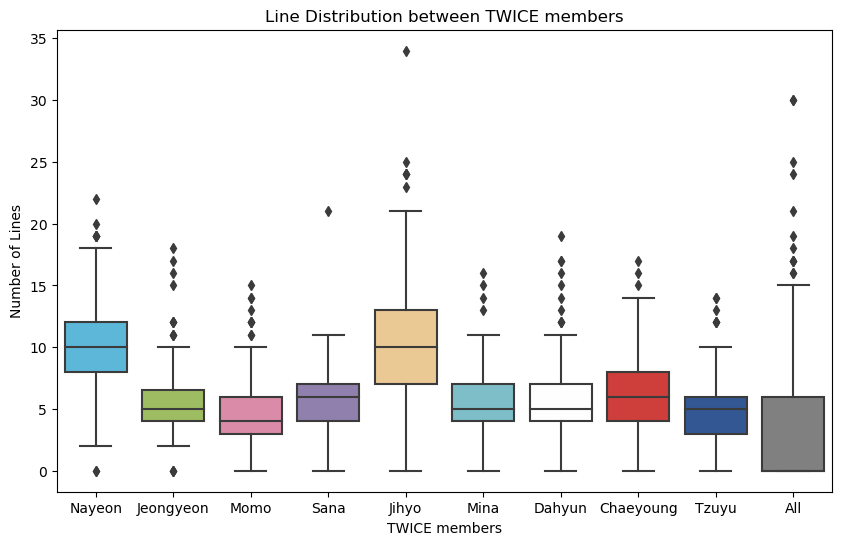

In [13]:
twice_members_colors = [
    '#49c0ec',   # Nayeon
    '#a3cc54',   # Jeongyeon
    '#e67ea3',   # Momo 
    '#8c79b4',   # Sana 
    '#f9cc85',   # Jihyo 
    '#71c7d4',   # Mina 
    '#fefefe',   # Dahyun
    '#e62722',   # Chaeyoung 
    '#2253a3',   # Tzuyu 
    '#808080',   # All
]

plt.figure(figsize=(10, 6))
sns.boxplot(data=transposed_lines, palette=twice_members_colors)
plt.title('Line Distribution between TWICE members')
plt.xlabel('TWICE members')
plt.ylabel('Number of Lines')
plt.show()

Based on these informations, we can see that Jihyo has the highest mean lines and is closely followed by Nayeon. This makes a lot of sense since they are the main and lead vocalists, and they have the best vocals in the group. However, although Jeongyeon is also a main vocalist, she sang substantially less lines which reflects the rumour that she asked to be given less lines in their songs.

We can also observe that Momo has the least mean lines which aligns with her role as the main dancer within the group. 

Looking at Dahyun and Chaeyoung, Chaeyoung has more lines on average. This matches her role as the main rapper in the group.

### Distribution of Lines (Nayeon & Jihyo)

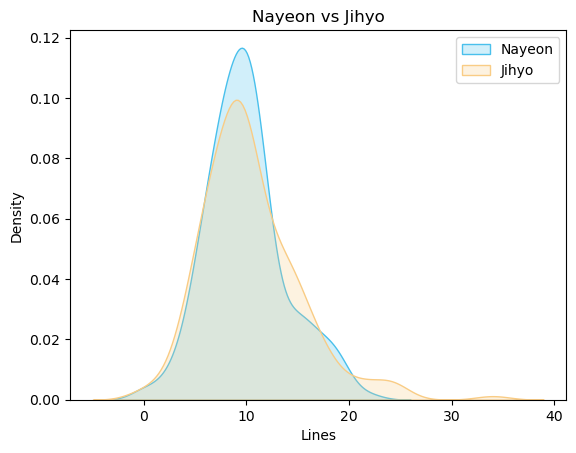

In [14]:
sns.kdeplot(data=transposed_lines['Nayeon'], shade=True, color=twice_members_colors[0], label='Nayeon')
sns.kdeplot(data=transposed_lines['Jihyo'], shade=True, color=twice_members_colors[4], label='Jihyo')

plt.title('Nayeon vs Jihyo')
plt.xlabel('Lines')
plt.ylabel('Density')
plt.legend()
plt.show()

We observe that Nayeon and Jihyo have similar density distribution which is roughly normally distributed. This could indicate that both Nayeon and Jihyo typically receive similar line distributions in songs. We are going to verify this through permutation testing below.

### Distribution of Lines (Dahyun & Chaeyoung)

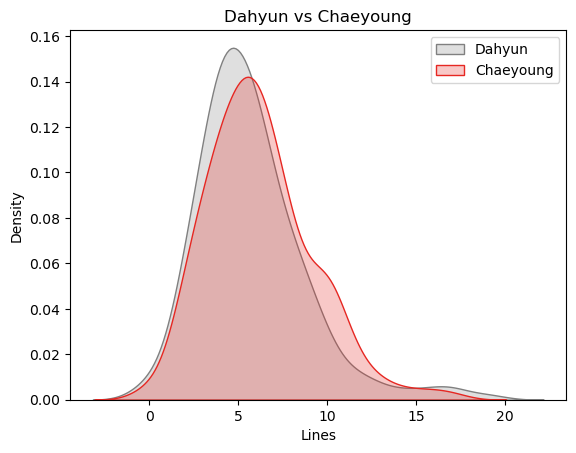

In [15]:
sns.kdeplot(data=transposed_lines['Dahyun'], shade=True, color=twice_members_colors[9], label='Dahyun')
sns.kdeplot(data=transposed_lines['Chaeyoung'], shade=True, color=twice_members_colors[7], label='Chaeyoung')

plt.title('Dahyun vs Chaeyoung')
plt.xlabel('Lines')
plt.ylabel('Density')
plt.legend()
plt.show()

We observe that Dahyun and Chaeyoung have similar density distribution which is roughly normally distributed, with Chaeyoung having a slightly higher mean than Dahyun. This could indicate that both Dahyun and Chaeyoung typically receive similar line distributions in songs. We are going to verify this through permutation testing below.

## Permutation Testing

### Nayeon & Jihyo

**Null Hypothesis:** Nayeon and Jihyo have similar line distributions

**Alternative Hypothesis:** Nayeon and Jihyo does not have similar line distributions

**Test Statistic:** Absolute difference of mean song lines

In [16]:
nayeon = transposed_lines['Nayeon']
nayeon_index = np.full(203, 'Nayeon', dtype=object)
nayeon_df = pd.DataFrame(nayeon).set_index(nayeon_index).reset_index().rename(columns={'Nayeon':'Lines'})
nayeon_df.head(5)

,index,Lines
0,Nayeon,9
1,Nayeon,5
2,Nayeon,5
3,Nayeon,11
4,Nayeon,7


In [17]:
jihyo = transposed_lines['Jihyo']
jihyo_index = np.full(203, 'Jihyo', dtype=object)
jihyo_df = pd.DataFrame(jihyo).set_index(jihyo_index).reset_index().rename(columns={'Jihyo':'Lines'})
jihyo_df.head(5)

,index,Lines
0,Jihyo,15
1,Jihyo,6
2,Jihyo,8
3,Jihyo,15
4,Jihyo,8


In [18]:
nayeon_jihyo = pd.concat([nayeon_df, jihyo_df], ignore_index=True).rename(columns={'index':'Names'})
nayeon_jihyo

,Names,Lines
0,Nayeon,9
1,Nayeon,5
2,Nayeon,5
3,Nayeon,11
4,Nayeon,7
...,...,...
401,Jihyo,23
402,Jihyo,16
403,Jihyo,20
404,Jihyo,4


In [19]:
observed_stats = abs(nayeon_jihyo.groupby('Names').mean().diff()["Lines"][-1])
observed_stats

0.48768472906403915

In [20]:
permutation_stats = []

for _ in range(1000):
    shuffled = np.random.permutation(nayeon_jihyo['Lines'])
    shuffled_df = nayeon_jihyo.assign(Lines=shuffled)
    stat = abs(shuffled_df.groupby('Names').mean().diff()["Lines"][-1])
    permutation_stats.append(stat)
    
np.mean(permutation_stats >= observed_stats)

0.263

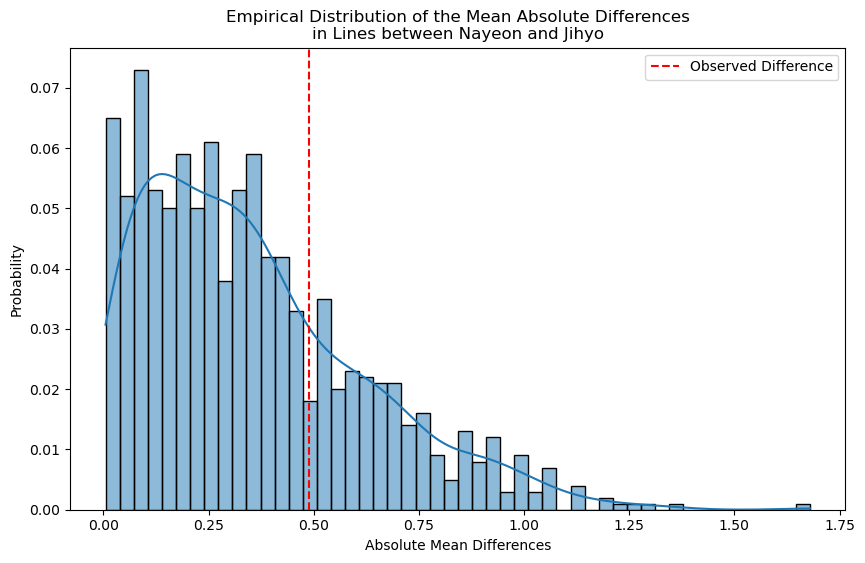

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(permutation_stats, bins=50, kde=True, stat='probability')
plt.title('Empirical Distribution of the Mean Absolute Differences\nin Lines between Nayeon and Jihyo')
plt.xlabel('Absolute Mean Differences')
plt.ylabel('Probability')

# Add a vertical line for the observed difference
plt.axvline(x=observed_stats, color='red', linestyle='--', label='Observed Difference')
plt.legend()

plt.show()

#### Conclusion
Based on our permutation test, we obtain a p-value of 26.3% which is larger than our set threshold of 5%. Hence, we fail to reject our null hypothesis, and conclude that there is no statistical difference between the line distributions of Nayeon and Jihyo.

### Dahyun & Chaeyoung

**Null Hypothesis:** Dahyun and Chaeyoung have similar line distributions

**Alternative Hypothesis:** Dahyun and Chaeyoung does not have similar line distributions

**Test Statistic:** Absolute difference of mean song lines

In [22]:
dahyun = transposed_lines['Dahyun']
dahyun_index = np.full(203, 'Dahyun', dtype=object)
dahyun_df = pd.DataFrame(dahyun).set_index(dahyun_index).reset_index().rename(columns={'Dahyun':'Lines'})
dahyun_df.head(5)

,index,Lines
0,Dahyun,3
1,Dahyun,5
2,Dahyun,6
3,Dahyun,2
4,Dahyun,5


In [23]:
chaeyoung = transposed_lines['Chaeyoung']
chaeyoung_index = np.full(203, 'Chaeyoung', dtype=object)
chaeyoung_df = pd.DataFrame(chaeyoung).set_index(chaeyoung_index).reset_index().rename(columns={'Chaeyoung':'Lines'})
chaeyoung_df.head(5)

,index,Lines
0,Chaeyoung,3
1,Chaeyoung,6
2,Chaeyoung,6
3,Chaeyoung,4
4,Chaeyoung,7


In [24]:
dub_chaeng = pd.concat([dahyun_df, chaeyoung_df], ignore_index=True).rename(columns={'index':'Names'})
dub_chaeng

,Names,Lines
0,Dahyun,3
1,Dahyun,5
2,Dahyun,6
3,Dahyun,2
4,Dahyun,5
...,...,...
401,Chaeyoung,15
402,Chaeyoung,10
403,Chaeyoung,10
404,Chaeyoung,8


In [25]:
observed_stats = abs(dub_chaeng.groupby('Names').mean().diff()["Lines"][-1])
observed_stats

0.4482758620689653

In [26]:
permutation_stats = []

for _ in range(1000):
    shuffled = np.random.permutation(dub_chaeng['Lines'])
    shuffled_df = dub_chaeng.assign(Lines=shuffled)
    stat = abs(shuffled_df.groupby('Names').mean().diff()["Lines"][-1])
    permutation_stats.append(stat)
    
np.mean(permutation_stats >= observed_stats)

0.144

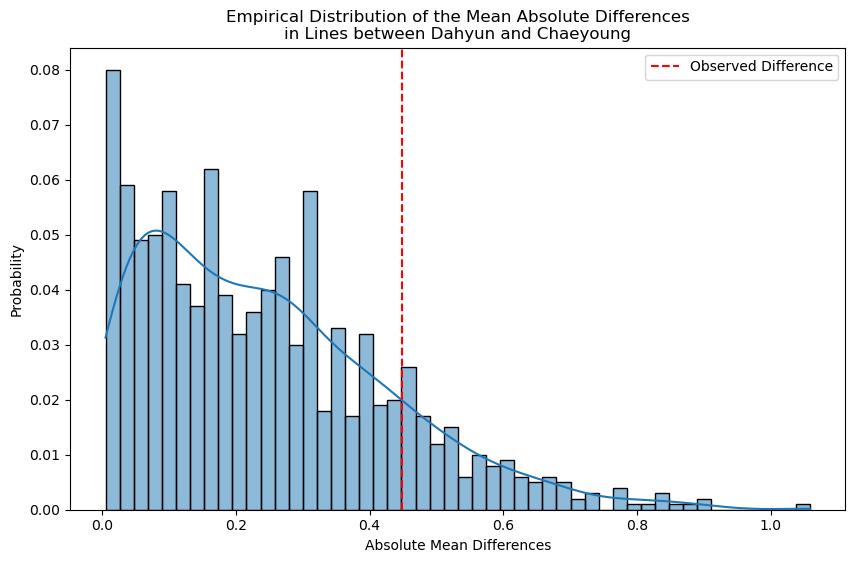

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(permutation_stats, bins=50, kde=True, stat='probability')
plt.title('Empirical Distribution of the Mean Absolute Differences\nin Lines between Dahyun and Chaeyoung')
plt.xlabel('Absolute Mean Differences')
plt.ylabel('Probability')

# Add a vertical line for the observed difference
plt.axvline(x=observed_stats, color='red', linestyle='--', label='Observed Difference')
plt.legend()

plt.show()

#### Conclusion
Based on our permutation test, we obtain a p-value of 14.4% which is larger than our set threshold of 5%. Hence, we fail to reject our null hypothesis, and conclude that there is no statistical difference between the line distributions of Dahyun and Chaeyoung.

## Conclusion

**Nayeon & Jihyo**: Based on our permutation test, we obtain a p-value of 26.3% which is larger than our set threshold of 5%. Hence, we fail to reject our null hypothesis, and conclude that there is no statistical difference between the line distributions of Nayeon and Jihyo.

**Dahyun & Chaeyoung**: Based on our permutation test, we obtain a p-value of 14.4% which is larger than our set threshold of 5%. Hence, we fail to reject our null hypothesis, and conclude that there is no statistical difference between the line distributions of Dahyun and Chaeyoung.